# Required end of module assignment: Non-linear optimization
---

## Overview

In this activity, you will review problems involving non-linear optimization using `scipy`, `pypfopt`, and `scikitlearn`.

This activity is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the activity, questions will get increasingly more complex. It is important that you adopt a programmer's mindset when completing this activity. Remember to run your code from each cell before submitting your activity, as doing so will give you a chance to fix any errors before submitting.



### Learning outcome addressed

- Integrate optimisation into an end-to-end data science project.


## Index:

- [Question 1](#Question-1)
- [Question 2](#Question-2)
- [Question 3](#Question-3)
- [Question 4](#Question-4)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

In [2]:
!pip install PyPortfolioOpt


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


### Nonlinear optimisation

In general, finding a maximum or minimum value of an objective function that is nonlinear presents a number of difficulties.  Earlier in the programme, these ideas were discussed in relation to gradient descent and the Nelder-Mead method.  Once constraints are incorporated, additional methods need to be consulted.  The objective of this module is to demonstrate some problem applications of nonlinear optimisation including constraints.  In this activity, you will explore general problems involving non-linear optimization with constraints using `scipy`, review your portfolio optimization work with `pyoptf`, and use Lasso regression to eliminate features in a regression setting.


#### Example

Consider the function $f(x, y) = x^2 + y^2$ defined and plotted below.  This function is convex, and has a readily accessible minimum.  To use `minimize`, the function is redefined where an array is input.  Using `minimize` requires a function that is a collection as an input.

In [3]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

In [4]:
def f(x, y):
    return x**2 + y**2

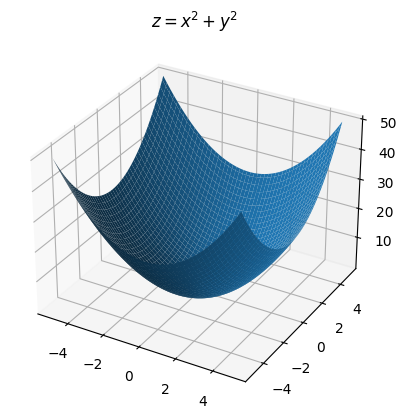

In [5]:
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, f(X, Y))
plt.title(r'$z = x^2 + y^2$');

In [6]:
#input as collection for the minimize function
def f(x):
    return x[0]**2 + x[1]**2

In [7]:
#find minimum with x0 = [2, 3] -- default is nelder meade
results = minimize(f, x0 = [2, 3])

In [8]:
print(results.x)

[ 1.89481791e-07 -1.41289459e-07]


Consider the same problem with a constraint.

$$\text{minimize} \quad x^2 + y^2$$
$$ x^4 + y^4 = 1$$

To incorporate the constraint, a function is defined that represents where the equation equals zero.  In the case of an inequality the constraint should be strictly positive.  The constraint function is referred to in a dictionary where both the constraint function is specified as an inequality or equality.

In [9]:
#constraint function
def constraint(x):
    return x[0]**4 + x[1]**4 - 1

In [10]:
#dictionary with constraints
constraints = {'type': 'eq', 'fun': constraint}

In [11]:
results2 = minimize(f, 
                   x0 = [-3, 3], 
                   constraints=constraints)

In [12]:
results2

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 1.4142120688993371
       x: [-8.402e-01  8.416e-01]
     nit: 9
     jac: [-1.681e+00  1.683e+00]
    nfev: 29
    njev: 9

In [13]:
print(results2.x)

[-0.84016803  0.84162328]


###### [Back to top](#Index:)

### Question 1

Use a similar approach to that above to solve the optimization problem below:

$$\text{minimize} \quad (x - 1)^2 + (y - 2)^2$$
$$\text{subject to} \quad x^2 + y^2 = 80$$

Assign the `minimize` results as `results` and the solution point (x,y) as an array to `ans1` below. Use `x0 = [1, 1]` as given.

In [14]:
x0 = [1, 1]
results = ''

###BEGIN SOLUTION
def f(x):
    return (x[0]-1)**2 + (x[1] - 2)**2
def c(x):
    return x[0]**2 + x[1]**2 - 80 
constraints = {'type': 'eq', 'fun': c}
results = minimize(f, [1, 1], constraints=constraints)
###END SOLUTION
#Answer check
print(results.x)

[4.00000059 7.9999997 ]


In [15]:
### BEGIN HIDDEN TESTS
x0 = [1, 1]
def f_(x):
    return (x[0]-1)**2 + (x[1] - 2)**2
def c_(x):
    return x[0]**2 + x[1]**2 - 80 
constraints_ = {'type': 'eq', 'fun': c}
results_ = minimize(f_, [1, 1], constraints=constraints_)



#
#
#
assert type(results) == type(results_)
np.testing.assert_array_almost_equal(results.x, results_.x)
### END HIDDEN TESTS

###### [Back to top](#Index:)

### Question 2

A company produces two products -- $x$ and $y$.  Due to labor management, the production is subject to the constraint $x + y = 42$.  Given the cost function 

$$c(x,y) = 8x^2 - xy + 12y^2$$

find the levels of production that minimize the cost given the constraint.  Assign your solution results object as `cost_results` and the solution points $(x,y)$ as an array to `min_cost` below.  Use `x0 = [1,1]` as given below.  

In [16]:
x0 = [1, 1]
cost_results = ''
min_cost = ''

###BEGIN SOLUTION
def f(x):
    return 8*x[0]**2 - x[0]*x[1] + 12*x[1]**2
def c(x):
    return x[0] + x[1] - 42
constraints = {'type': 'eq', 'fun': c}
cost_results = minimize(f, [1, 1], constraints=constraints)
min_cost = cost_results.x
###END SOLUTION
print(f'The firm should product {min_cost[0]: .0f} of product x and {min_cost[1]: .0f} of product y.')

The firm should product  25 of product x and  17 of product y.


In [17]:
### BEGIN HIDDEN TESTS
x0_ = [1, 1]
def f(x):
    return 8*x[0]**2 - x[0]*x[1] + 12*x[1]**2
def c(x):
    return x[0] + x[1] - 42
constraints_ = {'type': 'eq', 'fun': c}
cost_results_ = minimize(f, [1, 1], constraints=constraints_)
min_cost_ = cost_results_.x



#
#
#
assert type(cost_results) == type(cost_results_)
np.testing.assert_array_almost_equal(min_cost, min_cost_)
### END HIDDEN TESTS

###### [Back to top](#Index:)

### Question 3

A dataset containing stock prices for twenty popular tickers.  Use the `mean_historical_returns` and `sample_cov` functions together with the `EfficientFrontier` class from `pyfopt` to compute the optimal portfolio with the `max_sharpe` ratio.  Assign the mean as `mu` and covariance as `sigma`, efficient frontier as `frontier` and the optimal solution as `max_sharpe`.

In [18]:
from pypfopt import EfficientFrontier
from pypfopt.risk_models import sample_cov
from pypfopt.expected_returns import mean_historical_return

In [19]:
stocks = pd.read_csv('stock_sample.csv', index_col=0, parse_dates=True).dropna()

In [20]:
stocks.head()

,GOOG,AAPL,FB,BABA,AMZN,GE,AMD,WMT,BAC,GM,T,UAA,SHLD,XOM,RRC,BBY,MA,PFE,JPM,SBUX
date,,,,,,,,,,,,,,,,,,,,
2014-09-19,592.820374,94.772141,77.910004,93.889999,331.320007,23.421017,3.81,70.009918,16.123091,29.257343,29.198288,34.205002,25.780445,85.865265,70.663109,31.521009,75.214302,26.790411,55.553379,35.699104
2014-09-22,584.157959,94.866035,76.800003,89.889999,324.500000,23.233936,3.76,69.527008,16.199184,28.826324,29.222982,33.235001,25.519661,85.352486,69.379227,30.664898,74.124245,26.596525,55.371559,35.009247
2014-09-23,577.952087,96.349190,78.290001,87.169998,323.630005,23.180481,3.69,68.880135,16.218208,28.636683,29.025425,33.439999,25.780445,84.901581,69.112587,30.382578,73.491615,26.481960,55.398842,34.708897
2014-09-24,584.774597,95.513741,78.540001,90.570000,328.209991,23.100300,3.70,70.228569,16.341869,29.007357,29.140667,34.340000,24.597599,84.715904,68.085464,30.956347,74.990425,26.711092,56.026096,35.347137
2014-09-25,571.915283,91.871544,77.220001,88.919998,321.929993,22.761770,3.63,69.353905,16.027971,28.334970,28.877253,33.775002,23.899069,83.327873,66.475670,30.291498,72.722725,26.420275,54.680668,34.783981


In [21]:
mu = ''
sigma = ''
frontier = ''
max_sharpe = ''

###BEGIN SOLUTION
mu = mean_historical_return(stocks)
sigma = sample_cov(stocks)
frontier = EfficientFrontier(mu, sigma)
max_sharpe = frontier.max_sharpe()
###END SOLUTION
max_sharpe

OrderedDict([('GOOG', 0.0),
             ('AAPL', 0.0),
             ('FB', 0.0),
             ('BABA', 0.0),
             ('AMZN', 0.5838208399846879),
             ('GE', 0.0),
             ('AMD', 0.0071288743052239),
             ('WMT', 0.0),
             ('BAC', 0.0),
             ('GM', 0.0),
             ('T', 0.0),
             ('UAA', 0.0),
             ('SHLD', 0.0),
             ('XOM', 0.0),
             ('RRC', 0.0),
             ('BBY', 0.1044284673603389),
             ('MA', 0.2266606231390477),
             ('PFE', 0.0),
             ('JPM', 0.0779611952107017),
             ('SBUX', 0.0)])

In [22]:
### BEGIN HIDDEN TESTS
mu_ = mean_historical_return(stocks)
sigma_ = sample_cov(stocks)
frontier_ = EfficientFrontier(mu_, sigma_)
max_sharpe_ = frontier_.max_sharpe()



#
#
#
assert max_sharpe == max_sharpe_
### END HIDDEN TESTS

###### [Back to top](#Index:)

### Question 4

Below a dataset containing students performance in a Portugese school system based on mathematics scores is loaded and prepared. ([source](https://archive.ics.uci.edu/dataset/320/student+performance))  The given `Pipeline` will transform the categorical features and fit a `Lasso` model.  The resulting coefficients are stored in `coef_df`.  How many coefficients are non-zero?  Assign your answer as an integer to `non_zero_coefs` below.

Consult the documentation for questions about feature interpretation.

In [23]:
math = pd.read_csv('student-mat.csv', sep = ';')
math = math[math['G3'] != 0]
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [24]:
#subset features and target
X = math.iloc[:, :-3]
y = math.iloc[:, -1]
#make transformer
transformer = make_column_transformer((OneHotEncoder(drop = 'first'), math.select_dtypes('object').columns.tolist()),
                                      remainder = StandardScaler(),
                                     verbose_feature_names_out=False)
#pipeline to transform and model
pipe = Pipeline([('transform', transformer), 
                 ('model', Lasso(alpha = .5))])
#fit the model
pipe.fit(X, y)
#resulting coefficients
coef_df = pd.DataFrame({'features': pipe.named_steps['transform'].get_feature_names_out(),
         'coef': pipe.named_steps['model'].coef_}).sort_values(by = 'coef')
coef_df.head(5)

,features,coef
31,failures,-0.417395
38,absences,-0.124730
36,Walc,-0.021020
34,goout,-0.004312
21,activities_yes,0.000000


In [25]:
non_zero_coefs = ''

###BEGIN SOLUTION
non_zero_coefs = coef_df[coef_df['coef'] != 0].shape[0]
###END SOLUTION
print(f'Using Lasso with alpha = 0.5 resulted in {non_zero_coefs} non-zero coefficients.')

Using Lasso with alpha = 0.5 resulted in 5 non-zero coefficients.


In [26]:
### BEGIN HIDDEN TESTS
non_zero_coefs_ = coef_df[coef_df['coef'] != 0].shape[0]



#
#
#
assert non_zero_coefs == non_zero_coefs_, 'How many rows remain if you subset the coef_df to non-zero values?'
### END HIDDEN TESTS

Great job!  There are many additional libraries available for non-linear optimization that implement different approaches with and without constraints. This module provided a few important applications of non-linear optimization but there are many more industries and problems where these problems are used as models.  You are encouraged to explore if optimization could play a part in your capstone assignment.